In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("c://users//rohit//downloads//project//sales.csv")
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94


In [3]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales'],
      dtype='object')

In [4]:
df=df[[ 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode','Segment','City', 'State','Region','Category','Sales']]

In [5]:
df['Ship Mode'].values

array(['Second Class', 'Second Class', 'Second Class', ...,
       'Standard Class', 'Standard Class', 'Standard Class'], dtype=object)

In [6]:
df['Segment'].values

array(['Consumer', 'Consumer', 'Corporate', ..., 'Corporate', 'Corporate',
       'Corporate'], dtype=object)

In [7]:
df.shape

(9800, 10)

In [8]:
df.dropna(inplace=True)
print(df.shape)

(9800, 10)


In [9]:
df.isna().sum()

Order ID      0
Order Date    0
Ship Date     0
Ship Mode     0
Segment       0
City          0
State         0
Region        0
Category      0
Sales         0
dtype: int64

In [10]:
df.duplicated().sum()

2

In [11]:
df.drop_duplicates(subset=None,keep='first',inplace=False)

,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,Corporate,Los Angeles,California,West,Office Supplies,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,22.3680
...,...,...,...,...,...,...,...,...,...,...
9795,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,Corporate,Chicago,Illinois,Central,Office Supplies,3.7980
9796,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,Corporate,Toledo,Ohio,East,Office Supplies,10.3680
9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,Corporate,Toledo,Ohio,East,Technology,235.1880
9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,Corporate,Toledo,Ohio,East,Technology,26.3760


In [12]:
df.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'City',
       'State', 'Region', 'Category', 'Sales'],
      dtype='object')

In [13]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sales
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,261.9600
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,731.9400
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,Corporate,Los Angeles,California,West,Office Supplies,14.6200
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,957.5775
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,22.3680


In [14]:
sales_per_state=df.groupby('State')['Sales'].sum().reset_index()
sales_per_state.rename(columns={'Sales':'Total_Sales_per_state'},inplace=True)
df=df.merge(sales_per_state,on='State',how='left')
print(df.head())

         Order ID  Order Date   Ship Date       Ship Mode    Segment  \
0  CA-2017-152156  08/11/2017  11/11/2017    Second Class   Consumer   
1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   Consumer   
2  CA-2017-138688  12/06/2017  16/06/2017    Second Class  Corporate   
3  US-2016-108966  11/10/2016  18/10/2016  Standard Class   Consumer   
4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   Consumer   

              City       State Region         Category     Sales  \
0        Henderson    Kentucky  South        Furniture  261.9600   
1        Henderson    Kentucky  South        Furniture  731.9400   
2      Los Angeles  California   West  Office Supplies   14.6200   
3  Fort Lauderdale     Florida  South        Furniture  957.5775   
4  Fort Lauderdale     Florida  South  Office Supplies   22.3680   

   Total_Sales_per_state  
0             36458.3900  
1             36458.3900  
2            446306.4635  
3             88436.5320  
4             88436.532

In [15]:
Region_sales=df.groupby('Region')['Sales'].sum().reset_index()
Region_sales.rename(columns={'Sales':'Total_sales_per_region'},inplace=True)
df=df.merge(Region_sales,on='Region',how='left')
print(df.head())

         Order ID  Order Date   Ship Date       Ship Mode    Segment  \
0  CA-2017-152156  08/11/2017  11/11/2017    Second Class   Consumer   
1  CA-2017-152156  08/11/2017  11/11/2017    Second Class   Consumer   
2  CA-2017-138688  12/06/2017  16/06/2017    Second Class  Corporate   
3  US-2016-108966  11/10/2016  18/10/2016  Standard Class   Consumer   
4  US-2016-108966  11/10/2016  18/10/2016  Standard Class   Consumer   

              City       State Region         Category     Sales  \
0        Henderson    Kentucky  South        Furniture  261.9600   
1        Henderson    Kentucky  South        Furniture  731.9400   
2      Los Angeles  California   West  Office Supplies   14.6200   
3  Fort Lauderdale     Florida  South        Furniture  957.5775   
4  Fort Lauderdale     Florida  South  Office Supplies   22.3680   

   Total_Sales_per_state  Total_sales_per_region  
0             36458.3900             389151.4590  
1             36458.3900             389151.4590  
2    

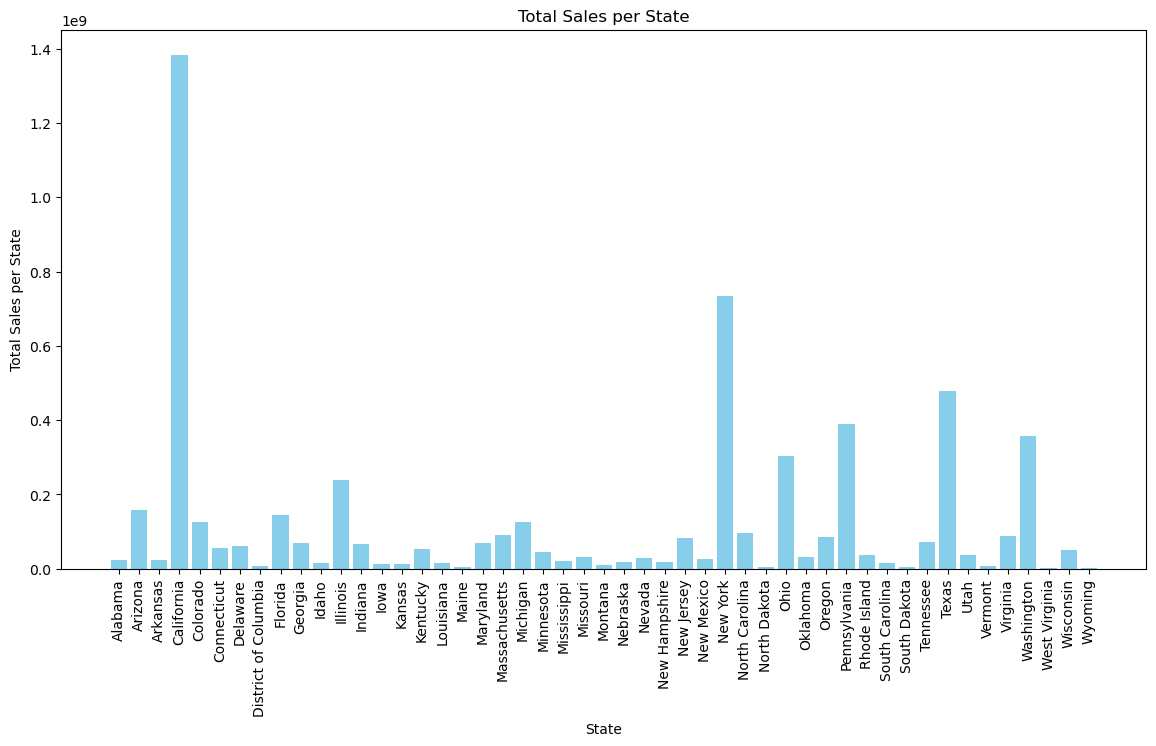

In [16]:
total_sales_per_state = df.groupby('State')['Total_sales_per_region'].sum()

plt.figure(figsize=(14, 7))
plt.bar(total_sales_per_state.index, total_sales_per_state.values, color='skyblue')
plt.xticks(rotation=90)
plt.xlabel('State')
plt.ylabel('Total Sales per State')
plt.title('Total Sales per State')
plt.show()

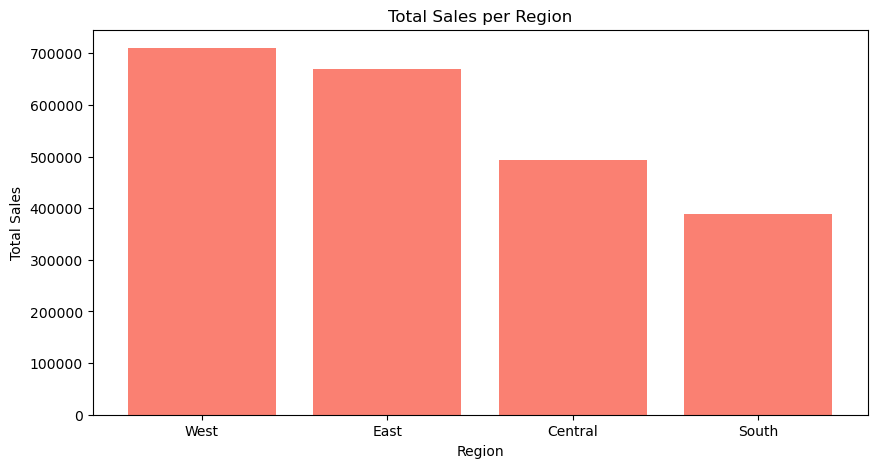

In [17]:
total_sales_per_region=df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
plt.figure(figsize=(10,5))
plt.bar(total_sales_per_region.index,total_sales_per_region.values,color='salmon')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales per Region')
plt.show()

In [18]:
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Segment,City,State,Region,Category,Sales,Total_Sales_per_state,Total_sales_per_region
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,261.9600,36458.3900,389151.4590
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Consumer,Henderson,Kentucky,South,Furniture,731.9400,36458.3900,389151.4590
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,Corporate,Los Angeles,California,West,Office Supplies,14.6200,446306.4635,710219.6845
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Furniture,957.5775,88436.5320,389151.4590
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Consumer,Fort Lauderdale,Florida,South,Office Supplies,22.3680,88436.5320,389151.4590


In [19]:
df.to_csv("c://users//rohit//downloads//project//clean_sales.csv",index=False)

In [9]:
!pip install pandas sqlalchemy


In [11]:
!pip show pymysql


In [12]:
pip install pymysql


   ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/45.0 kB ? eta -:--:--
   --------- ------------------------------ 10.2/45.0 kB ? eta -:--:--
   ------------------ --------------------- 20.5/45.0 kB 217.9 kB/s eta 0:00:01
   ------------------------------------ --- 41.0/45.0 kB 245.8 kB/s eta 0:00:01
   ---------------------------------------- 45.0/45.0 kB 185.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [10]:
import pandas as pd
from sqlalchemy import create_engine

# Step 1: Load the CSV data
csv_file_path = 'c:/users/rohit/downloads/project/clean_sales.csv'  # Update this path if necessary
df = pd.read_csv(csv_file_path)

# Step 2: Create a database engine
# Replace 'your_username' and 'your_password' with your MySQL credentials
engine = create_engine('mysql+pymysql://root:@localhost:3306/sales')

# Step 3: Create a table and insert data
df.to_sql('clean_sales', con=engine, if_exists='replace', index=False)

print("Data imported successfully into the clean_sales table.")


ModuleNotFoundError: No module named 'pymysql'

In [ ]:
import os

# Step 4: Create a dump of the database
os.system("mysqldump -u root -p sales > C:/Users/rohit/Downloads/Project/sales_dump.sql")
